In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,RMSprop
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2024-04-29 20:24:41.703983: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 20:24:41.706016: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 20:24:41.774238: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 20:24:42.050810: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 20:24:43.321935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## **Classification Binaire**

## Préparation du DataSet avec make_circle()

Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)


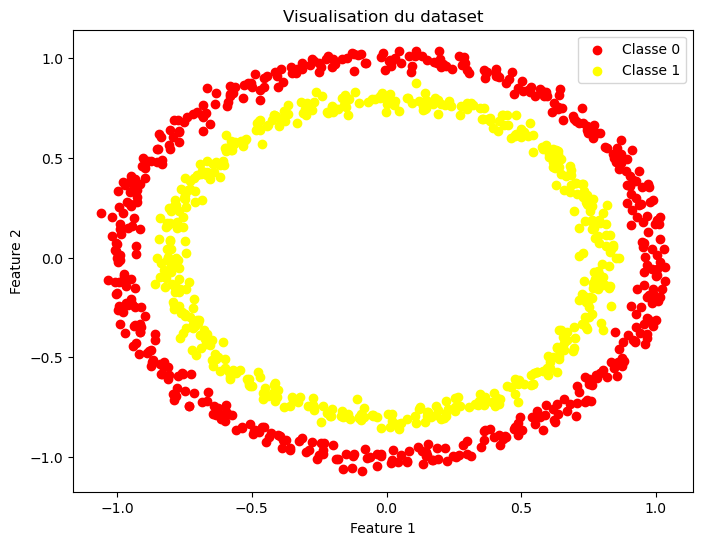

In [2]:
# Création du dataset avec make circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# Affichage des dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)

# Visualisation des données
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='yellow', label='Classe 1')
plt.title("Visualisation du dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

==> En regardant la visualisation, on peut voir que les classes ne peuvent pas être séparées linéairement. Une fonction non linéaire sera nécessaire pour séparer ces classes.

## Définition du modèle FCNN


Un modèle FCNN (Fully Connected Neural Network) est un réseau de neurones où chaque neurone dans une couche est connecté à tous les neurones de la couche précédente et de la couche suivante. Il est utilisé pour des tâches telles que la classification et la régression, en apprenant des représentations complexes des données grâce à des transformations non linéaires et à l'optimisation des poids du réseau.

In [3]:
model = Sequential()
# Couche entièrement connectée avec 100 neurones cachés
model.add(Dense(100, activation='relu', input_shape=(2,)))
model.add(Dense(100, activation='relu'))
# Couche de sortie avec activation sigmoid
model.add(Dense(1, activation='sigmoid'))
# Affichage du résumé de l'architecture du modèle
model.summary()

/home/mariem/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation et entrainement du modèle

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5146 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4917 - loss: 0.6885 - val_accuracy: 0.5000 - val_loss: 0.6875
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4997 - loss: 0.6813 - val_accuracy: 0.5000 - val_loss: 0.6826
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 0.6778 - val_accuracy: 0.5100 - val_loss: 0.6746
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 0.6659 - val_accuracy: 0.5000 - val_loss: 0.6606
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5645 - loss: 0.6493 - val_accuracy: 0.7000 - val_loss: 0.6447
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.6265 - val_accuracy: 0.7700 - val_loss: 0.6075
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.5863 - val_accuracy: 0.8100 - v

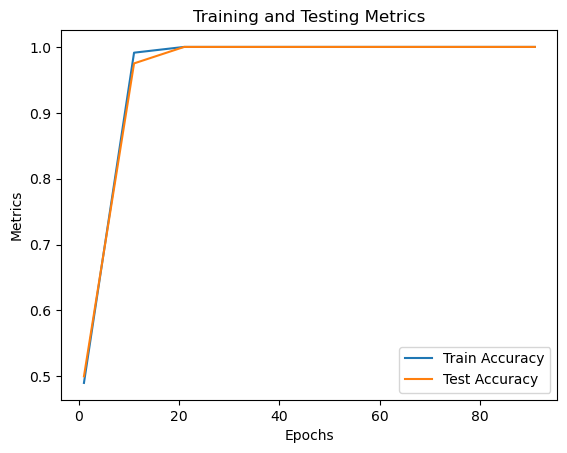

In [4]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Affichage de la progression du modèle
epochs = range(1, 101,10)
plt.plot(epochs, history.history['accuracy'][::10], label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'][::10], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Testing Metrics')
plt.legend()
plt.show()


Pour améliorer les performances du modèle, il est essentiel de comprendre que les résultats initiaux indiquent une faible précision (82% sur le train et 70% sur le test), suggérant un **sous-apprentissage**. Pour remédier à cela, nous pouvons envisager plusieurs techniques :

1.   Ajouter des couches ou des neurones :
2.   Augmenter le nombre d'époques
3.   Changer l'optimiseur

## Traçage des frontières de décision pour l'ensemble d'entrainement et de test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


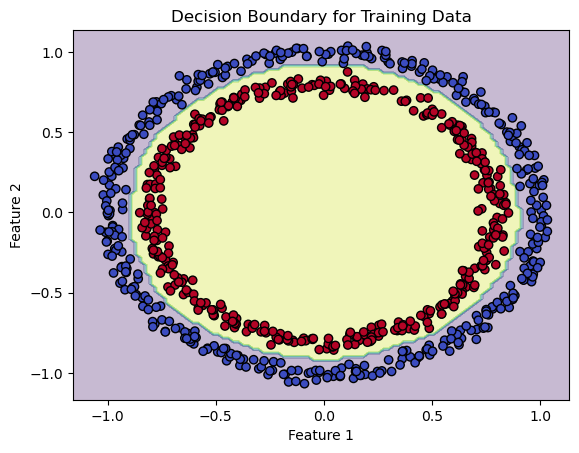

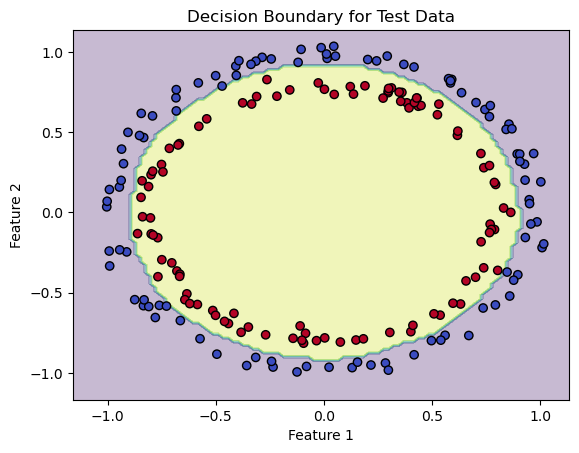

In [5]:
# Créer une grille de points
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Faire des prédictions sur la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z)

# Tracer les frontières de décision
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Training Data')
plt.show()

# Tracer les frontières de décision pour les données de test
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Test Data')
plt.show()


## **MultiClassification**

### Préparation du DataSet avec make_blobs()

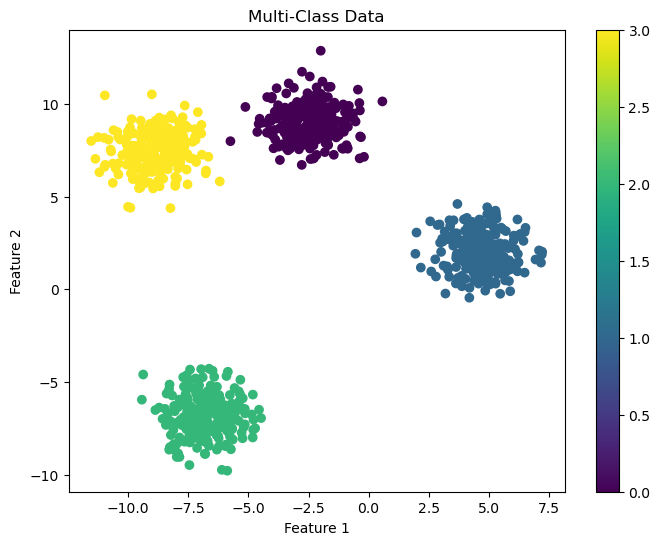

In [6]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Multi-Class Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

Comme les données sont générées à partir de plusieurs blobs avec des centres différents, une fonction non linéaire est nécessaire pour séparer ces classes.

#### Entrainement du modèle

In [7]:
model = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4483 - loss: 2.1265 - val_accuracy: 0.9150 - val_loss: 0.3034
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9416 - loss: 0.2832 - val_accuracy: 1.0000 - val_loss: 0.1602
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.1561 - val_accuracy: 1.0000 - val_loss: 0.1125
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.1147 - val_accuracy: 1.0000 - val_loss: 0.0880
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0875 - val_accuracy: 1.0000 - val_loss: 0.0734
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0762 - val_accuracy: 1.0000 - val_loss: 0.0622
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0626 - val_accuracy: 1.0000 - val_loss: 0.0544
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0541 - val_accuracy: 1.0000 - val_loss:

#### les métriques de classification

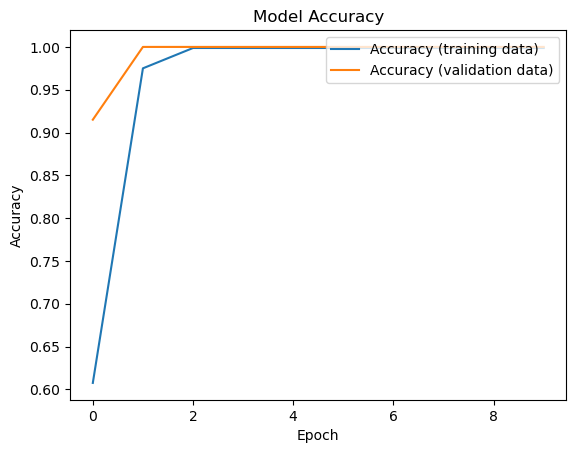

In [8]:
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [9]:
y_true = y_test
y_pred_probabilities = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]


#### Traçage des frontières de décision pour l'ensemble d'entrainement et de test

1606/1606 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step


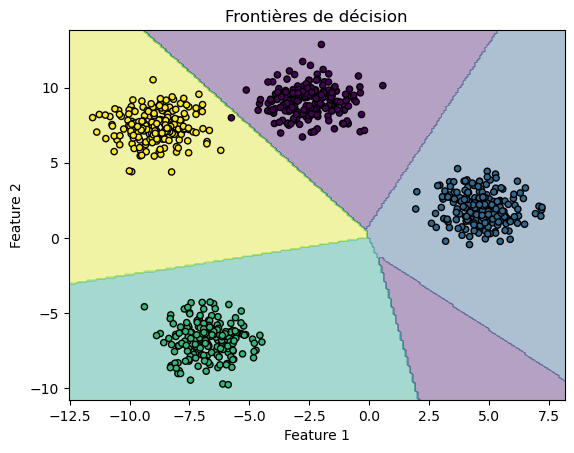

1343/1343 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step


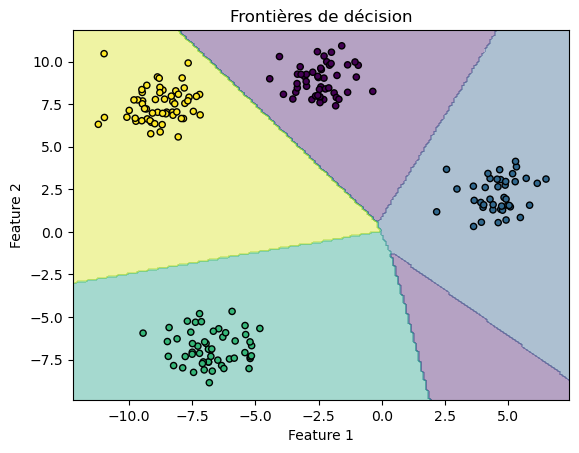

In [10]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    if y.ndim > 1:
        y = np.argmax(y, axis=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title("Frontières de décision")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_train, y_train, model)
plot_decision_boundary(X_test, y_test, model)

/home/mariem/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


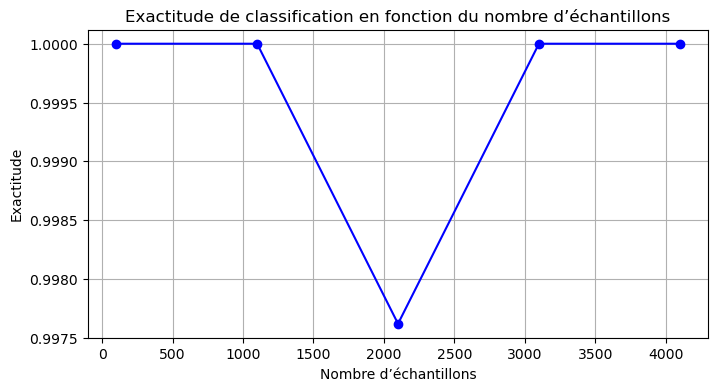

In [11]:
sample_sizes = np.arange(100, 5100, 1000)
accuracies = []

for size in sample_sizes:
    X, y = make_blobs(n_samples=size, centers=4, n_features=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential([
        Dense(64, input_shape=(2,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    scores = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(scores[1])

plt.figure(figsize=(8, 4))
plt.plot(sample_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.title('Exactitude de classification en fonction du nombre d’échantillons')
plt.xlabel('Nombre d’échantillons')
plt.ylabel('Exactitude')
plt.grid(True)
plt.show()
